<a href="https://colab.research.google.com/github/KaanErdogdu/7_Bootcamo_Siniflandirma_Problemleri/blob/master/Proje_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
import datetime as dt
import re
from sklearn import datasets
iris = datasets.load_iris()
import warnings
warnings.filterwarnings('ignore')

In [113]:
projelogi=pd.read_csv("Logistic Reg Teknosa.csv")

In [114]:
projelogi.head()

,Week (Mon-Sun),Custom dimension 1,Sessions,Avg. pageviews per session,Avg. session length (sec),Product Detail Views,Product List Clicks,Product Adds To Cart,Product Checkouts,Transactions
0,2020|29,731C0F2E-DDC3-E811-90F9-00155D619647,189.0,4.89,311.0,1772.0,20.0,6.0,61.0,0.0
1,2020|30,4283B82C-20B2-EA11-80D0-00155D61134E,163.0,16.90,145.0,447.0,156.0,156.0,2067.0,14.0
2,2020|29,4A1E910F-F5B2-EA11-80D5-00155D7CD320,139.0,6.47,626.0,892.0,128.0,7.0,105.0,0.0
3,2020|29,4283B82C-20B2-EA11-80D0-00155D61134E,137.0,12.83,181.0,171.0,59.0,58.0,793.0,11.0
4,2020|28,73982672-3C90-E911-80CB-00155D61134E,121.0,5.83,684.0,33.0,5.0,0.0,0.0,0.0


In [115]:
projelogi.columns = ['week', 'user_id', 'sessions', 'page_session', 'avg_session_duration','product_view','product_click','add_to_cart','product_checkout','transactions']

In [116]:
projelogi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154763 entries, 0 to 154762
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   week                  154763 non-null  object 
 1   user_id               154759 non-null  object 
 2   sessions              154759 non-null  float64
 3   page_session          154748 non-null  float64
 4   avg_session_duration  154748 non-null  float64
 5   product_view          154759 non-null  float64
 6   product_click         154759 non-null  float64
 7   add_to_cart           154759 non-null  float64
 8   product_checkout      154752 non-null  float64
 9   transactions          154752 non-null  float64
dtypes: float64(8), object(2)
memory usage: 11.8+ MB


In [117]:
projelogi.nunique()

week                        5
user_id                 94960
sessions                  105
page_session             1879
avg_session_duration     3321
product_view              394
product_click             123
add_to_cart               113
product_checkout          332
transactions               34
dtype: int64

In [118]:
projelogi['week_j'] = projelogi['week'].str.split('|') 
projelogi['week_j']

0         [2020, 29]
1         [2020, 30]
2         [2020, 29]
3         [2020, 29]
4         [2020, 28]
             ...    
154758    [2020, 29]
154759    [2020, 29]
154760    [2020, 30]
154761    [2020, 31]
154762    [2020, 31]
Name: week_j, Length: 154763, dtype: object

In [119]:
projelogi_1 = projelogi.groupby(["week","user_id"]).agg({"sessions":"sum",
                                                            "page_session":"mean",
                                                            "avg_session_duration":"mean",
                                                            "product_view":"sum",
                                                            "product_click":"sum",
                                                            "add_to_cart":"sum",
                                                            "product_checkout":"sum",
                                                            "transactions":"sum"}).reset_index()

projelogi_1.head(10)

,week,user_id,sessions,page_session,avg_session_duration,product_view,product_click,add_to_cart,product_checkout,transactions
0,2020|27,0000279A-87C8-E811-90F9-00155D619647,3.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0
1,2020|27,000219E1-DBC3-E811-90F9-00155D619647,4.0,4.50,206.0,21.0,0.0,0.0,0.0,0.0
2,2020|27,00039966-101C-E911-80C7-00155D619677,1.0,4.00,26.0,0.0,0.0,0.0,3.0,0.0
3,2020|27,000906F6-40B5-EA11-80D0-00155D61134E,8.0,2.00,25.0,41.0,0.0,0.0,0.0,0.0
4,2020|27,0009F07C-A37B-E911-80CA-00155D7CD320,4.0,1.75,54.0,27.0,0.0,0.0,0.0,0.0
5,2020|27,000B0994-B7B8-EA11-80D0-00155D61134E,2.0,1.00,0.0,6.0,0.0,0.0,0.0,0.0
6,2020|27,000D22CD-6507-E911-80C7-00155D619677,2.0,16.50,846.0,13.0,0.0,1.0,15.0,1.0
7,2020|27,000DD9E4-BABB-EA11-80D0-00155D61134E,10.0,5.50,191.0,33.0,0.0,1.0,9.0,1.0
8,2020|27,000E323F-A797-EA11-80D0-00155D61134E,1.0,1.00,0.0,2.0,0.0,0.0,0.0,0.0
9,2020|27,001318CF-A5C5-E811-90F9-00155D619647,2.0,5.00,152.0,2.0,1.0,0.0,0.0,0.0


In [120]:
projelogi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154759 entries, 0 to 154758
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   week                  154759 non-null  object 
 1   user_id               154759 non-null  object 
 2   sessions              154759 non-null  float64
 3   page_session          154744 non-null  float64
 4   avg_session_duration  154744 non-null  float64
 5   product_view          154759 non-null  float64
 6   product_click         154759 non-null  float64
 7   add_to_cart           154759 non-null  float64
 8   product_checkout      154759 non-null  float64
 9   transactions          154759 non-null  float64
dtypes: float64(8), object(2)
memory usage: 11.8+ MB


In [121]:
projelogi_1.nunique()

week                        5
user_id                 94960
sessions                  105
page_session             1879
avg_session_duration     3321
product_view              394
product_click             123
add_to_cart               113
product_checkout          332
transactions               34
dtype: int64

In [122]:
def func(x):
  if x >= 1:
    return 1
  elif x==0:
    return 0

In [123]:
projelogi_1["transactions_dummy"]= projelogi_1["transactions"].apply(func)

In [124]:
projelogi_1.head()

,week,user_id,sessions,page_session,avg_session_duration,product_view,product_click,add_to_cart,product_checkout,transactions,transactions_dummy
0,2020|27,0000279A-87C8-E811-90F9-00155D619647,3.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2020|27,000219E1-DBC3-E811-90F9-00155D619647,4.0,4.50,206.0,21.0,0.0,0.0,0.0,0.0,0
2,2020|27,00039966-101C-E911-80C7-00155D619677,1.0,4.00,26.0,0.0,0.0,0.0,3.0,0.0,0
3,2020|27,000906F6-40B5-EA11-80D0-00155D61134E,8.0,2.00,25.0,41.0,0.0,0.0,0.0,0.0,0
4,2020|27,0009F07C-A37B-E911-80CA-00155D7CD320,4.0,1.75,54.0,27.0,0.0,0.0,0.0,0.0,0


In [125]:
X = projelogi_1[['sessions', 'page_session', 'avg_session_duration','product_view','product_click','add_to_cart','product_checkout']]
y = projelogi_1.transactions
print(X[:5])
print(y[:5])

   sessions  page_session  ...  add_to_cart  product_checkout
0       3.0          1.00  ...          0.0               0.0
1       4.0          4.50  ...          0.0               0.0
2       1.0          4.00  ...          0.0               3.0
3       8.0          2.00  ...          0.0               0.0
4       4.0          1.75  ...          0.0               0.0

[5 rows x 7 columns]
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: transactions, dtype: float64


In [135]:
X = projelogi_1[['sessions','product_click','add_to_cart','product_checkout']]
y = projelogi_1.transactions_dummy
print(X[:5])
print(y[:5])

   sessions  product_click  add_to_cart  product_checkout
0       3.0            0.0          0.0               0.0
1       4.0            0.0          0.0               0.0
2       1.0            0.0          0.0               3.0
3       8.0            0.0          0.0               0.0
4       4.0            0.0          0.0               0.0
0    0
1    0
2    0
3    0
4    0
Name: transactions_dummy, dtype: int64


In [136]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [137]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [138]:
log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.92
Modelin test verisindeki doğruluğu   : 0.92


In [140]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)  

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.915716,0.915999
1,0.010,0.915643,0.915999
2,0.100,0.915619,0.916031
3,1.000,0.915619,0.916031
4,10.000,0.915619,0.916031
5,100.000,0.915619,0.916031
6,1000.000,0.915619,0.916031


In [141]:
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y,test_size=0.20, random_state=111)

In [142]:
projelogi_1 = LogisticRegression()
projelogi_1.fit(X_eğitim, y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
tahmin_eğitim = projelogi_1.predict(X_eğitim)
tahmin_test = projelogi_1.predict(X_test)

In [144]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [145]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[112290   1080]
 [  9367   1070]]
Hata Matrisi (Test verileri)
------------------------------
[[28100   258]
 [ 2341   253]]


In [146]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 28100
Doğru pozitif sayısı   : 253
Yanlış pozitif sayısı  : 258
Yanlış negatif sayısı  : 2341


In [147]:
from sklearn.metrics import accuracy_score

print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))


Hesaplanan doğruluk değeri      :  0.9160312742310674


In [148]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))


Hesaplanan doğruluk değeri      :  0.49510763209393344


In [149]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))


Hesaplanan doğruluk değeri      :  0.49510763209393344


In [150]:
from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))


Hesaplanan doğruluk değeri   :  0.09753276792598303


In [151]:
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))


Hesaplanan özgünlük değeri   :  0.9909020382255448


In [152]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(y_test, tahmin_test)
duyarlılık_değeri = recall_score(y_test, tahmin_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

Hesaplanan f1 skoru   :  0.16296296296296298
f1_score() değeri     :  0.16296296296296298


In [153]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test)))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     28358
           1       0.50      0.10      0.16      2594

    accuracy                           0.92     30952
   macro avg       0.71      0.54      0.56     30952
weighted avg       0.89      0.92      0.89     30952

f1_score() değeri        : 0.16
recall_score() değeri    : 0.10
precision_score() değeri : 0.50


Hassasiyet : [0.92309714 0.49510763]
Duyarlılık : [0.99090204 0.09753277]
F1 Skoru   : [0.95579857 0.16296296]


In [156]:
tahmin_test_ihtimal = projelogi_1.predict_proba(X_test)[:,1]


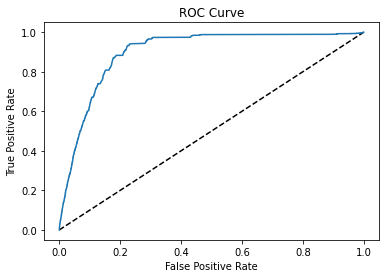

In [157]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [158]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))


AUC Değeri :  0.8991228557898047


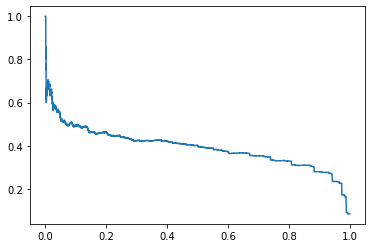

In [159]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()

In [160]:
from sklearn.metrics import log_loss

print("Logartimik Kayıp (log-loss) : " , log_loss(y_test, tahmin_test_ihtimal))
print("Hata Oranı                  : " , 1- accuracy_score(y_test, tahmin_test))

Logartimik Kayıp (log-loss) :  0.24827052680103082
Hata Oranı                  :  0.08396872576893255
